# Vietnam Covid-19 Analysis - Live

In [1]:
import urllib, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime,timedelta,date
import numpy as np

### 1. Get raw data from government website

In [2]:
# URL to get daily new cases by City
url = "https://ncov.vncdc.gov.vn/v2/vietnam/by-current?start_time=2021-04-28"

response = urllib.request.urlopen(url)
data = json.loads(response.read())
data[0]

{'id': 7,
 'tinh': 'Tỉnh Bến Tre',
 'ngay_hien_tai': 0,
 'ngay_truoc_do': 0,
 'ngay_hom_kia': 34,
 'population': 1289100,
 'ngay_lien_tiep': 0,
 'ngay_lien_tiep_trong_nuoc': 1,
 'ca_nhiem': 831,
 'ma': 83,
 'data': {'2021-04-28': 0,
  '2021-04-29': 0,
  '2021-04-30': 0,
  '2021-05-01': 0,
  '2021-05-02': 0,
  '2021-05-03': 0,
  '2021-05-04': 0,
  '2021-05-05': 0,
  '2021-05-06': 0,
  '2021-05-07': 0,
  '2021-05-08': 0,
  '2021-05-09': 0,
  '2021-05-10': 0,
  '2021-05-11': 0,
  '2021-05-12': 0,
  '2021-05-13': 0,
  '2021-05-14': 0,
  '2021-05-15': 0,
  '2021-05-16': 0,
  '2021-05-17': 0,
  '2021-05-18': 0,
  '2021-05-19': 0,
  '2021-05-20': 0,
  '2021-05-21': 0,
  '2021-05-22': 0,
  '2021-05-23': 0,
  '2021-05-24': 0,
  '2021-05-25': 0,
  '2021-05-26': 0,
  '2021-05-27': 0,
  '2021-05-28': 0,
  '2021-05-29': 0,
  '2021-05-30': 0,
  '2021-05-31': 0,
  '2021-06-01': 0,
  '2021-06-02': 0,
  '2021-06-03': 0,
  '2021-06-04': 0,
  '2021-06-05': 0,
  '2021-06-06': 0,
  '2021-06-07': 0,
  '2021

### 2. Convert single city to Pandas Dataframe

In [3]:
# Test data for single City

# count number of date values
count =len(list(data[0]["data"].keys()))

#Dimensions
cityId = [data[0]["id"]]*count
name = [data[0]["tinh"]]*count
code = [data[0]["ma"]]*count

#Facts
date = list(data[0]["data"].keys())
value = list(data[0]["data"].values())

#data
df_temp = pd.DataFrame(list(zip(cityId,name,code,date,value)),columns=['CityID','City_Name','Code','Date','Cases'])
df_temp.head()

,CityID,City_Name,Code,Date,Cases
0,7,Tỉnh Bến Tre,83,2021-04-28,0
1,7,Tỉnh Bến Tre,83,2021-04-29,0
2,7,Tỉnh Bến Tre,83,2021-04-30,0
3,7,Tỉnh Bến Tre,83,2021-05-01,0
4,7,Tỉnh Bến Tre,83,2021-05-02,0


### 3. Create Pandas Dataframe for full data set

In [4]:
covidData = []
for d in data:
    count =len(list(d["data"].keys()))
    cityID = [d["id"]]*count
    cityName = [d["tinh"]]*count
    cityCode = [d["ma"]]*count
    date = list(d["data"].keys())
    value = list(d["data"].values())
    for i in range(count): 
        row ={'CityID':cityID[i],'CityName':cityName[i],'CityCode':cityCode[i],'Date':date[i],'Cases':value[i]}
        covidData.append(row)
#covidData
df = pd.DataFrame(covidData)
df['Date']= pd.to_datetime(df['Date'])
df.describe()

,CityID,CityCode,Cases
count,6867.000000,6867.000000,6867.000000
mean,32.793651,65.126984,36.697830
std,18.471534,121.827952,307.116046
min,1.000000,1.000000,0.000000
25%,17.000000,26.000000,0.000000
50%,33.000000,49.000000,0.000000
75%,49.000000,77.000000,2.000000
max,64.000000,999.000000,8226.000000


### 4. Plot daily total cases

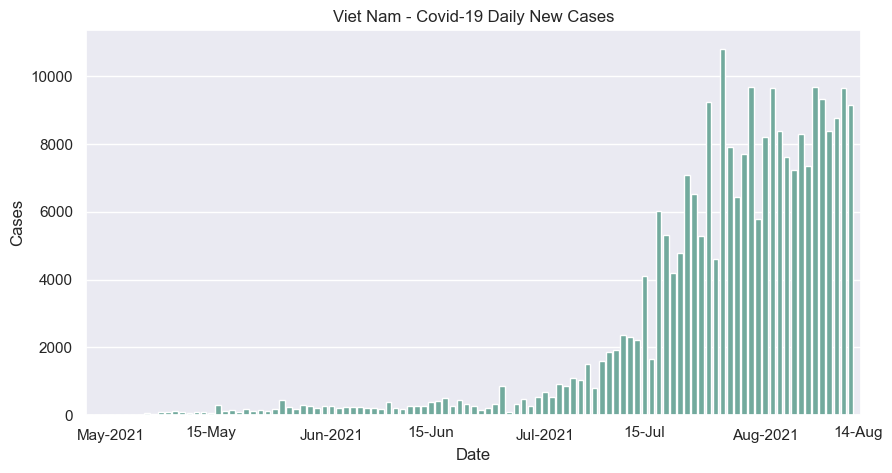

In [9]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 5))
plt.title('Viet Nam - Covid-19 Daily New Cases')
# plot a bar chart
ax = sns.barplot(
    x="Date", 
    y="Cases", 
    data=df,
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

#get Major ticks & Minor ticks & latest tick
major_ticks = []
major_tick_labels = []
minor_ticks = []
minor_tick_labels = []

for loc, label in zip(ax.get_xticks(), ax.get_xticklabels()):
    when = datetime.strptime(label.get_text()[:10], '%Y-%m-%d')
    if when.day == 1:
        major_ticks.append(loc)
        major_tick_labels.append(when.strftime("%b-%Y"))
    if when.day == 15:
        minor_ticks.append(loc)
        minor_tick_labels.append(when.strftime("%d-%b"))
    else:
        if when == df['Date'].max():
            minor_ticks.append(loc)
            minor_tick_labels.append(when.strftime("%d-%b"))
        
ax.set_xticks(major_ticks)
ax.set_xticklabels(major_tick_labels)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticklabels(minor_tick_labels, minor=True)
plt.show()

### 5. More Analysis
#### 5.1. Moving Average 7 days

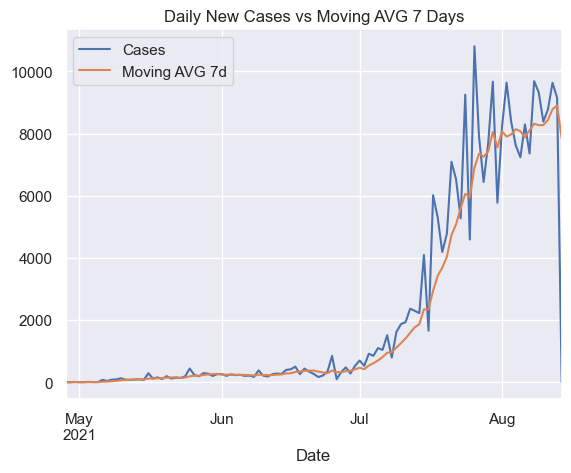

In [6]:
# Get daily total cases
df_daily = pd.DataFrame(df.groupby('Date').sum()['Cases'])

# get new column for moving average(mean) last 7 days
df_daily['Moving AVG 7d'] = df_daily.rolling(7,min_periods=1).mean()

df_daily.plot(title='Daily New Cases vs Moving AVG 7 Days')
plt.show()

#### 5.2 Top 5 Cities in the last 7 days

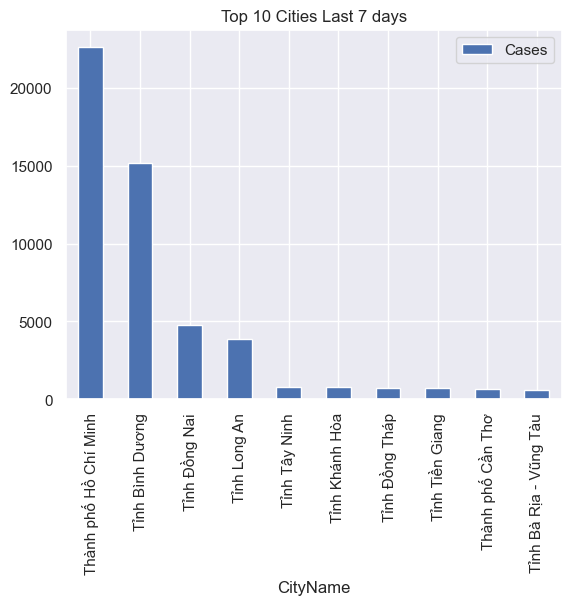

In [7]:
# Get the dates  Last 7 days
currentdate = datetime.today()

# Using np.datetime64 to match with df['Date'] type
mindate = np.datetime64(currentdate - timedelta(days = 7))
df_7days = df.loc[df['Date']>mindate]

# Get total cases each City
df_7days = df_7days.groupby('CityName').sum()['Cases'].to_frame()

# Get top 5 based on total cases
df_7days = df_7days.sort_values(by=['Cases'],ascending=False).head(10)

df_7days.plot.bar(title='Top 10 Cities Last 7 days')
plt.show()